# Brute Force Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testAndres import sumCharges

### Program CsCl lattice

In [2]:
#Defining the atomic system

alattice = 1. # Defines the lattice spacing of the cell
a = np.array ([1,0,0])
b = np.array ([0,1,0])
c = np.array ([0,0,1])

nq = 2
q = np.zeros([nq], dtype = 'float')
q[0] =  1. # Tells to tag a positive charge to the first q (Cs)
q[1] = -1. # Tells to tag a negative charge to the second q (Cl)
tau = np.zeros([3,nq], dtype = 'float')
tau[:,0] = [0,0,0] # Indicates the coordinates of the (Cs) in the cell/lattice
tau[:,1] = [1./2.,1./2.,1./2.] # Indicates the coordinates of the (Cl) in the cell/lattice

In [3]:
sumCharges(alattice, a, b, c, q, tau, 10)

-0.46543775079933725

In [4]:
#Defining the atomic system

alattice = 1. # Defines the lattice spacing of the cell
a = np.array ([1,0,0])
b = np.array ([0,1,0])
c = np.array ([0,0,1])

nqNaCl = 8
qNaCl = np.zeros([nqNaCl], dtype = 'float')
qNaCl[0] =  1. 
qNaCl[1] = -1. 
qNaCl[2] = 1.
qNaCl[3] = -1.
qNaCl[4] =  1. 
qNaCl[5] = -1. 
qNaCl[6] =  1. 
qNaCl[7] = -1. 
tauNaCl = np.zeros([3,nqNaCl], dtype = 'float')
tauNaCl[:,0] = [1./2.,1./2.,1./2.]
tauNaCl[:,1] = [0,0,0]
tauNaCl[:,2] = [0,0,1./2.]
tauNaCl[:,3] = [1./2.,1./2.,0]
tauNaCl[:,4] = [0,1./2.,0]
tauNaCl[:,5] = [1./2.,0,1./2.]
tauNaCl[:,6] = [1./2.,0,0]
tauNaCl[:,7] = [0,1./2.,1./2.]

In [5]:
sumCharges(alattice, a, b, c, qNaCl, tauNaCl, 20)

-13.980516643557275

In [6]:
import testSerial

testSerial.sumCharges(alattice, a, b, c, q, tau, 50)

-0.46460291377885704

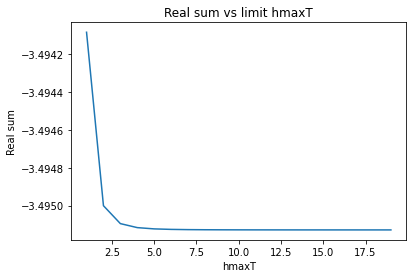

In [19]:
#Produce plot of real sum vs hmaxT
maxT = np.arange(1, 20)
realSums = []
for i in range(len(maxT)):
    realSums.append(sumCharges(alattice, a, b, c, qNaCl, tauNaCl, maxT[i]))

plt.figure()
plt.title('Real sum vs limit hmaxT')
plt.xlabel('hmaxT')
plt.ylabel('Real sum')
# plt.yscale('log')
plt.plot(maxT, realSums)
plt.show()

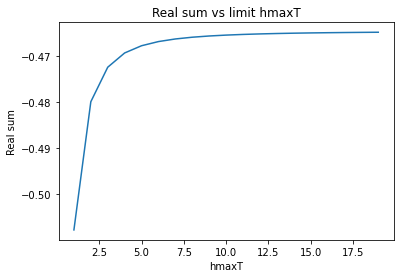

In [3]:
#Produce plot of real sum vs hmaxT
maxT = np.arange(1, 20)
realSums = []
for i in range(len(maxT)):
    realSums.append(sumCharges(alattice, a, b, c, q, tau, maxT[i]))

plt.figure()
plt.title('Real sum vs limit hmaxT')
plt.xlabel('hmaxT')
plt.ylabel('Real sum')
# plt.yscale('log')
plt.plot(maxT, realSums)
plt.show()


# Ewald Method

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ewaldChargesParallel import ewald

In [12]:
#Defining the atomic system

alattice = 1. # Defines the lattice spacing of the cell
a = np.array ([1,0,0])
b = np.array ([0,1,0])
c = np.array ([0,0,1])

nqNaCl = 8
qNaCl = np.zeros([nqNaCl], dtype = 'float')
qNaCl[0] =  1. 
qNaCl[1] = -1. 
qNaCl[2] = 1.
qNaCl[3] = -1.
qNaCl[4] =  1. 
qNaCl[5] = -1. 
qNaCl[6] =  1. 
qNaCl[7] = -1. 
tauNaCl = np.zeros([3,nqNaCl], dtype = 'float')
tauNaCl[:,0] = [1./2.,1./2.,1./2.]
tauNaCl[:,1] = [0,0,0]
tauNaCl[:,2] = [0,0,1./2.]
tauNaCl[:,3] = [1./2.,1./2.,0]
tauNaCl[:,4] = [0,1./2.,0]
tauNaCl[:,5] = [1./2.,0,1./2.]
tauNaCl[:,6] = [1./2.,0,0]
tauNaCl[:,7] = [0,1./2.,1./2.]

In [18]:
np.sum(ewald(alattice, a, b, c, qNaCl, tauNaCl, 4, 5, 5))

-3.4951291892663683

### Program CsCl lattice

In [2]:
#Defining the atomic system

alattice = 1. # Defines the lattice spacing of the cell
a = np.array ([1,0,0])
b = np.array ([0,1,0])
c = np.array ([0,0,1])

nq = 2
q = np.zeros([nq], dtype = 'float')
q[0] =  1. # Tells to tag a positive charge to the first q (Cs)
q[1] = -1. # Tells to tag a negative charge to the second q (Cl)
tau = np.zeros([3,nq], dtype = 'float')
tau[:,0] = [0,0,0] # Indicates the coordinates of the (Cs) in the cell/lattice
tau[:,1] = [1./2.,1./2.,1./2.] # Indicates the coordinates of the (Cl) in the cell/lattice

In [3]:
np.sum(ewald(alattice, a, b, c, q, tau, 4, 10, 10))

-2.035361509452596

In [11]:
thValue = -2.035362 #reference value for comparison

#Produce plot of reciprocal sum vs hmaxg
maxG = np.arange(1, 20)
madelungEwald = []
for i in range(len(maxG)):
    ewaldVals = ewald(alattice, a, b, c, q, tau, 4, maxG[i], 10)
    madelungEwald.append(np.sum(ewaldVals))

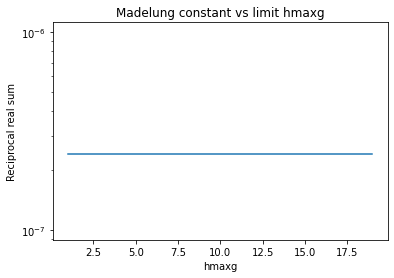

In [15]:
errorMadelung = -(np.array(madelungEwald) - thValue) / thValue
plt.figure()
plt.title('Madelung constant vs limit hmaxg')
plt.xlabel('hmaxg')
plt.ylabel('Reciprocal real sum')
plt.yscale('log')
plt.plot(maxG, errorMadelung)
plt.show()

In [16]:
thValue = -2.035362  # reference value for comparison

#Produce plot of real sum vs hmaxT
maxT = np.arange(1, 20)
madelungEwaldT = []
for i in range(len(maxT)):
    ewaldVals = ewald(alattice, a, b, c, q, tau, 4, 10, maxT[i])
    madelungEwaldT.append(np.sum(ewaldVals))

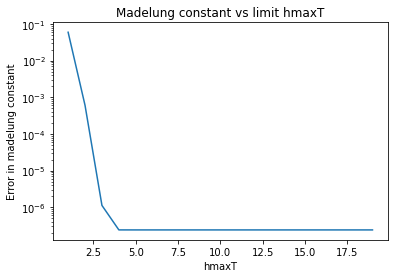

In [18]:
errorMadelungT = -(np.array(madelungEwaldT) - thValue) / thValue
plt.figure()
plt.title('Madelung constant vs limit hmaxT')
plt.xlabel('hmaxT')
plt.ylabel('Error in madelung constant')
plt.yscale('log')
plt.plot(maxT, errorMadelungT)
plt.show()

In [19]:
thValue = -2.035362  # reference value for comparison

#Produce plot of madelung constant vs eta
etas = np.arange(0.1, 1, 0.05)
madelungEwaldEta = []
for i in range(len(etas)):
    ewaldVals = ewald(alattice, a, b, c, q, tau, etas[i], 10, 10)
    madelungEwaldEta.append(np.sum(ewaldVals))

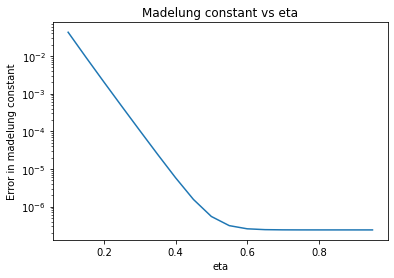

In [20]:
errorMadelungEta = -(np.array(madelungEwaldEta) - thValue) / thValue
plt.figure()
plt.title('Madelung constant vs eta')
plt.xlabel('eta')
plt.ylabel('Error in madelung constant')
plt.yscale('log')
plt.plot(etas, errorMadelungEta)
plt.show()

### Convergence for different $\eta$

In [8]:
thValue = -2.035362 #reference value for comparison

#Produce plot of reciprocal sum vs hmaxg
maxG = np.arange(1, 20)
#Produce plot of madelung constant vs eta
etas = np.linspace(0.1, 1, 10)
etasPlots = []
for s in range(len(etas)):
    madelungEwaldEtas = []
    for i in range(len(maxG)):
        ewaldVals = ewald(alattice, a, b, c, q, tau, etas[s], maxG[i], 10)
        madelungEwaldEtas.append(np.sum(ewaldVals))
    etasPlots.append(madelungEwaldEtas)

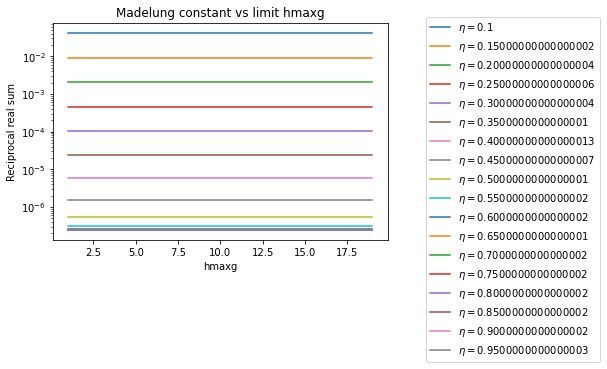

In [13]:
errMadEtasRec = []
for i in range(len(etas)):
    errMadEtasRec.append(-(np.array(etasPlots[i]) - thValue) / thValue)
plt.figure()
plt.title('Madelung constant vs limit hmaxg')
plt.xlabel('hmaxg')
plt.ylabel('Reciprocal real sum')
plt.yscale('log')
for i in range(len(etas)):
    plt.plot(maxG, errMadEtasRec[i], label='$\eta = $'+str(etas[i]))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [14]:
thValue = -2.035362 #reference value for comparison

#Produce plot of reciprocal sum vs hmaxT
maxT = np.arange(1, 20)
#Produce plot of madelung constant vs eta
etas = np.arange(0.1, 1, 0.05)
etasPlotsT = []
for s in range(len(etas)):
    madelungEwaldEtasT = []
    for i in range(len(maxT)):
        ewaldVals = ewald(alattice, a, b, c, q, tau, etas[s], 10, maxT[i])
        madelungEwaldEtasT.append(np.sum(ewaldVals))
    etasPlotsT.append(madelungEwaldEtasT)

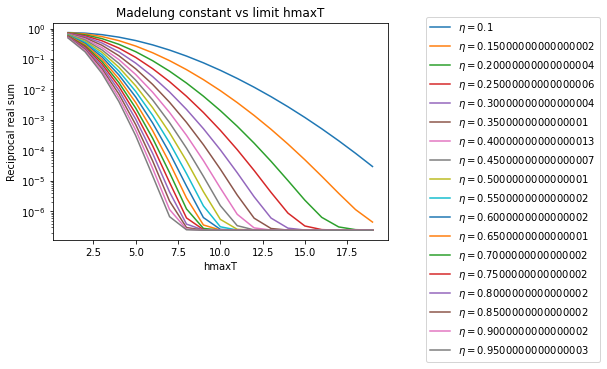

In [15]:
errMadEtasRec = []
for i in range(len(etas)):
    errMadEtasRec.append(-(np.array(etasPlotsT[i]) - thValue) / thValue)
plt.figure()
plt.title('Madelung constant vs limit hmaxT')
plt.xlabel('hmaxT')
plt.ylabel('Reciprocal real sum')
plt.yscale('log')
for i in range(len(etas)):
    plt.plot(maxT, errMadEtasRec[i], label='$\eta = $'+str(etas[i]))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()